In [1]:
# importing the required libraries
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,execute
from qiskit import Aer,transpile,assemble
from qiskit.visualization import plot_histogram,plot_bloch_multivector,array_to_latex
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state
import math
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram

# Use your API token to access real quantum hardware
IBMProvider.save_account(token='fc9764d6ddc72b895aec2189a792025fe4e8a37698378c45198dd34d1dd2411ef27f8297105e2c6fcb7884bc9a31c4efdc6f7127bfbdfc06e2d3c8cee5237375',overwrite=True)
# Choose the Quantum Hub as your provider
provider=IBMProvider(instance='ibm-q/open/main')

In [11]:
# function to generate a random number between [min and max]
def RandNumGenerator(min,max):
    # return min or max if both are equal
    if(min==max): 
        return min
    # swap min and max if min is greater than max
    if(min>max):
        return RandNumGenerator(max,min)
    # get the range length of the random number
    range_length=max-min+1;
    # get the minimum number of qubits/bits required to represent the range
    qubits_to_use=math.ceil(math.log2(range_length))
    # classical register to store the measurement of the qubits
    bits=ClassicalRegister(qubits_to_use)
    # quantum register to store the qubits
    qubits=QuantumRegister(qubits_to_use)
    # create a quantum circuit with the qubits and classical registers
    circuit=QuantumCircuit(qubits,bits)
    # apply hadamard gate to all the qubits
    # this will create a superposition of all the possible states with equal probability
    for i in range(qubits_to_use):
        circuit.h(qubits[i])
    # measure the qubits
    for i in range(qubits_to_use):
        circuit.measure(qubits[i],bits[i])
    # choose the backend you want to use
    backend=Aer.get_backend('qasm_simulator')
    # execute the circuit
    job=execute(circuit,backend,shots=1)
    # get the result
    result=job.result()
    counts=result.get_counts()
    # Extract the number from the result(dictionary)
    number=next(iter(counts))
    # convert the binary number to decimal
    number=int(number,2)
    # if the number is greater than the range length-1 then generate the number again
    # range_length-1 is used because the range is starting from 0
    if(number>range_length-1):
        return RandNumGenerator(min,max)
    # return the random number after adding the minimum value of the range
    return  number+min


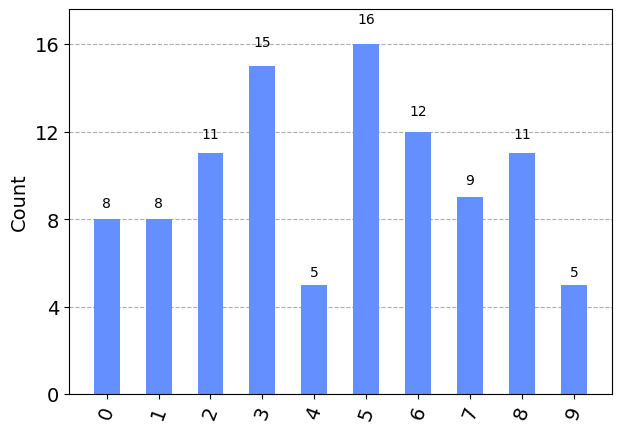

In [31]:
# Dict to store the random numbers
cir=dict()
# total number of random numbers to generate
x=100
# generate 'x' random numbers between [min,max]
for i in range(x):
    num=RandNumGenerator(0,9)
    # add the random number to the dictionary with its count
    if(num in cir):
        cir[num]+=1
    else:
        cir[num]=1
# Sort the dictionary
cir=dict(sorted(cir.items()))
# plot the histogram
plot_histogram(cir)
